<br>
<center> <h2>Maestría en Inteligencia Analítica para la Toma de Decisiones</h2> </center>
<center> <h3>Modelos avanzados para análisis de datos 1</h3> </center>
<br>
<h3>P2 - Used Vehicle Price Prediction</h3>

##### Presentado por:
    Camilo Andres Suarez Trillos      (200321493)
    Daniel Augusto Leon Moreno        (201920439)
    Hector Fabian Rodriguez Mayorga   (201921382)
    Carlos Andres Paez Rojas          (201924257)

<h4> Junio 2020</h4>
<br>

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
data = pd.read_csv('Data/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

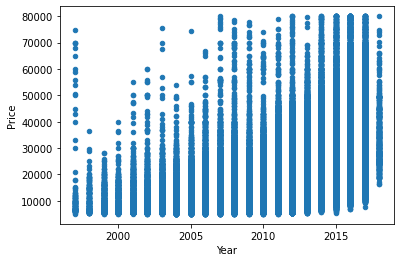

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

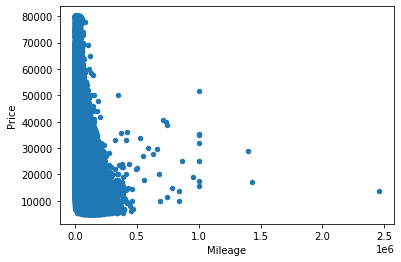

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 

# Python packages

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

# Sample data

In [10]:
data['Price'] = data['Price'].astype('int64')
data['Year'] = data['Year'].astype('int64')
data['Mileage'] = data['Mileage'].astype('int64')
data['State'] = data['State'].astype('object')
data['Make'] = data['Make'].astype('object')
data['Model'] = data['Model'].astype('object')
data.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

Seleccionamos el 5% de los datos para entrenar el modelo.

In [11]:
np.random.seed(247)
sample = data.sample(frac =.05) 
sample.shape

(25000, 6)

In [12]:
feature_cols = ['Year', 'Mileage', 'State', 'Make', 'Model']
X = sample[feature_cols]
y = sample['Price']

Tomamos el 70% de los datos para entrenar el modelo y el 30% restante para evaluarlo.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
dummy1 = pd.get_dummies(sample['State'])
dummy2 = pd.get_dummies(sample['Make'])
dummy3 = pd.get_dummies(sample['Model'])

In [15]:
sample_lr = pd.concat([sample, dummy1, dummy2, dummy3], axis=1)
del sample_lr['State']
del sample_lr['Make']
del sample_lr['Model']
sample_lr.head()

,Price,Year,Mileage,AK,AL,AR,AZ,CA,CO,CT,...,Yaris4dr,YarisBase,YarisLE,Yukon,Yukon2WD,Yukon4WD,Yukon4dr,tC2dr,xB5dr,xD5dr
76316,34744,2015,34094,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360477,17691,2016,39359,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223097,33713,2016,21991,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219520,15998,2017,10258,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
213386,12584,2010,147537,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_lr = sample_lr
y_lr = sample_lr['Price']
del X_lr['Price']

In [17]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3)

# Regression tree

In [18]:
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [19]:
scores = cross_val_score(treereg, X_lr, y_lr, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5565.376562753277

Calibramos el parámetro max_depth y evaluar nuevamente su desempeño.

In [20]:
max_depth_range = range(85, 110)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_lr, y_lr, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

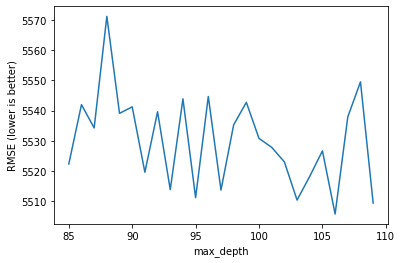

In [21]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [22]:
treereg = DecisionTreeRegressor(max_depth=106, random_state=1)
treereg.fit(X_lr, y_lr)

DecisionTreeRegressor(criterion='mse', max_depth=106, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [23]:
feature_cols = X_lr.columns

In [24]:
imp = pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

In [25]:
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=feature_cols)

In [26]:
y_pred = treereg.predict(X_test_lr)
y_pred

array([14938., 35970., 12099., ..., 24365., 21995.,  6495.])

In [27]:
np.sqrt(mean_squared_error(y_test_lr, y_pred))

570.9966802189847

Como se observa, se reduce el MSE alrededor de un 90%.

In [28]:
imp.importance.describe()

count    613.000000
mean       0.001631
std        0.011366
min        0.000000
25%        0.000022
50%        0.000171
75%        0.000712
max        0.244622
Name: importance, dtype: float64

In [29]:
imp = imp.sort_values(by='importance', ascending=False)
imp

,feature,importance
0,Year,2.446218e-01
1,Mileage,1.206922e-01
505,Silverado,3.294760e-02
70,Land,2.886516e-02
526,Super,2.326872e-02
63,GMC,2.320259e-02
75,Mercedes-Benz,1.711634e-02
71,Lexus,1.708638e-02
577,Wrangler,1.643699e-02
276,F-1504WD,1.593602e-02


Seleccionamos 60 variables, que corresponden al 80% del nivel de importancia.

In [30]:
top = imp.head(60)
tot = pd.DataFrame.sum(top['importance'])
tot

0.8050691754457535

In [31]:
columns_top = top['feature'].values
columns_top

array(['Year', 'Mileage', 'Silverado', 'Land', 'Super', 'GMC',
       'Mercedes-Benz', 'Lexus', 'Wrangler', 'F-1504WD', 'BMW',
       'Tahoe4WD', '25004WD', 'Suburban4WD', 'Sierra', 'Tundra',
       'TahoeLT', 'Porsche', 'Ford', 'Tahoe2WD', 'Suburban2WD',
       'Escalade', 'TerrainFWD', 'CorvetteCoupe', 'FusionSE', 'Cadillac',
       'Grand', 'Kia', 'FocusSE', 'Dodge', 'CorollaLE', ' FL', 'Ram',
       'Hyundai', ' TX', 'F-250Lariat', 'CruzeSedan', '3',
       'F-150SuperCrew', ' CA', 'TerrainAWD', 'F-150Lariat', 'Tesla',
       'Nissan', 'Tacoma4WD', 'EscapeSE', 'Acura', 'EscapeFWD', ' NC',
       'MalibuLT', 'Lincoln', 'Yukon4WD', 'AcadiaFWD', 'FiestaSE', ' GA',
       'OdysseyTouring', 'A8', 'Volvo', 'E-ClassE', 'FusionS'],
      dtype=object)

In [32]:
X_lr_top = X_lr[np.intersect1d(X_lr.columns, columns_top)]
X_test_lr_top = X_test_lr[np.intersect1d(X_test_lr.columns, columns_top)]
X_lr_top

,CA,FL,GA,NC,TX,25004WD,3,A8,AcadiaFWD,Acura,...,Tahoe4WD,TahoeLT,TerrainAWD,TerrainFWD,Tesla,Tundra,Volvo,Wrangler,Year,Yukon4WD
76316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015,0
360477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,0
223097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,0
219520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017,0
213386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2010,0
172240,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2014,0
144827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015,0
238605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2007,0
392209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,0
476674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,1


Volvemos a entrenar el modelo con las variables filtradas.

In [33]:
treereg = DecisionTreeRegressor(max_depth=110, random_state=1)
treereg.fit(X_lr_top, y_lr)

DecisionTreeRegressor(criterion='mse', max_depth=110, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [34]:
y_pred = treereg.predict(X_test_lr_top)
y_pred

array([14938., 35970., 12099., ..., 24365., 21995.,  6495.])

In [35]:
np.sqrt(mean_squared_error(y_test_lr, y_pred))

300.4294586211669

Así, con el set de datos de prueba obtenemos un MSE de 300.

# Saving model

In [36]:
from sklearn.externals import joblib

G:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
joblib.dump(treereg, 'P2-UsedVehiclePricePrediction(Regression_tree).pkl', compress=3)

['P2-UsedVehiclePricePrediction(Regression_tree).pkl']